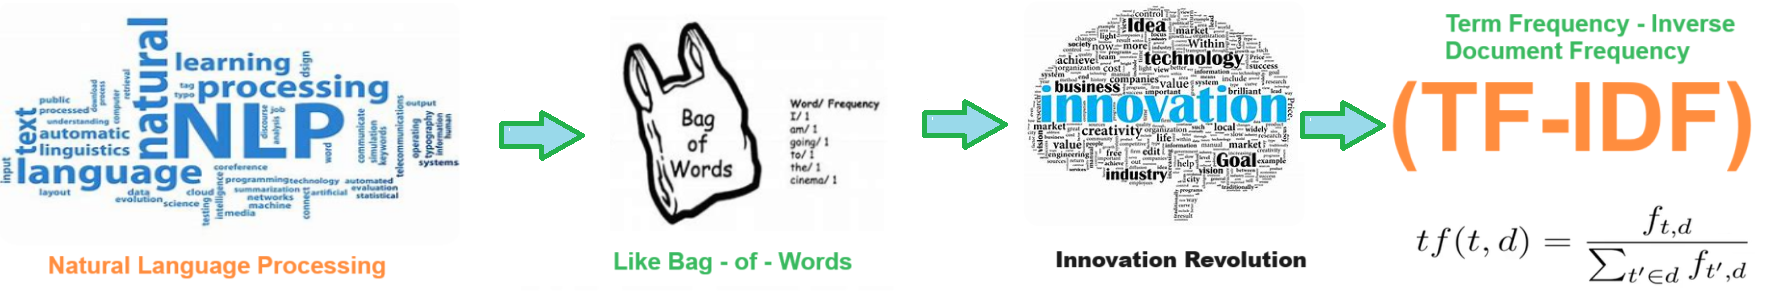

# Term Frequency Inverse Document Frequency (TF-IDF)

## Term Frequency-Inverse Document Frequency (TF-IDF) is a numerical statistic used in natural language processing and information retrieval to measure the importance of a term in a document relative to a collection of documents, considering both the frequency of occurrence of the term within the document and its rarity across the entire document collection."

#### by Joe Eberle started on 04/09/2024 - https://github.com/JoeEberle/ - josepheberle@outlook.com

In [1]:
first_install = False 
if first_install:
    !pip install schedule
    !pip install zipp

In [1]:
import os
import schedule
from datetime import datetime
import pandas as pd 
import quick_logger as ql
import talking_code as tc 
import file_manager as fm 
import time
print(f"Libraries Imported succesfully on {datetime.now().date()} at {datetime.now().time()}") 

Libraries Imported succesfully on 2024-03-17 at 22:14:05.996959


## Optional Step 0 - Intitiate Configuration Settings and name the overall solution

In [3]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  

solution_name = 'term_frequency_inverse_document_frequency'

## Optional Step 0 - Intitiate Logging and debugging 

In [4]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_start(solution_name, start_time) 
ql.set_speaking_log(False)
ql.set_speaking_steps(False)
ql.pvlog('info',f'Process {solution_name} Step 0 - Initializing and starting Logging Process.') 

Process solution_temple Step 0 - Initializing and starting Logging Process.


In [1]:
sample_sentences = ["My cat is NOC","my dog is Luna","I love to ski","I hate sliced beets"]

In [12]:
sample_sentences = ["My cat is NOC","my dog is Luna","I love to ski","I hate sliced beets"]
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(sample_sentences) 


TfidfVectorizer(stop_words='english')

In [13]:
tfidf.vocabulary_

{'cat': 1,
 'noc': 6,
 'dog': 2,
 'luna': 5,
 'love': 4,
 'ski': 7,
 'hate': 3,
 'sliced': 8,
 'beets': 0}

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

sample_sentences = ["My cat is NOC", "My dog is Luna", "I love to ski", "I hate sliced beets"]

tfidf = TfidfVectorizer(stop_words='english')    # Initialize TfidfVectorizer
tfidf.fit(sample_sentences)   # Fit TfidfVectorizer to the sample sentences
feature_names = tfidf.get_feature_names_out() # Get the feature names (words)
tfidf_vectors = tfidf.transform(sample_sentences) # Transform the sample sentences into TF-IDF vectors

# Loop through each sentence and print the sentence along with its most important word
for i, sentence in enumerate(sample_sentences):
    # Get the indices of the words with the highest TF-IDF scores for the current sentence
    top_word_index = tfidf_vectors[i].argmax()
    # Get the most important word for the current sentence
    most_important_word = feature_names[top_word_index]
    # Print the sentence and its most important word
    print(f"Sentence: {sentence}, Most Important Word: {most_important_word}")


Sentence: My cat is NOC, Most Important Word: cat
Sentence: My dog is Luna, Most Important Word: dog
Sentence: I love to ski, Most Important Word: love
Sentence: I hate sliced beets, Most Important Word: beets


In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample sentences
sample_sentences = ["My cat is NOC", "My dog is Luna", "I love to ski", "I hate sliced beets"]

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit TfidfVectorizer to the sample sentences
tfidf.fit(sample_sentences)

# Get the feature names (words)
feature_names = tfidf.get_feature_names_out()

# Transform the sample sentences into TF-IDF vectors
tfidf_vectors = tfidf.transform(sample_sentences)

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Sentence', 'Most_Important_Word'])

# Loop through each sentence and store the sentence along with its most important word in the DataFrame
for i, sentence in enumerate(sample_sentences):
    # Get the indices of the words with the highest TF-IDF scores for the current sentence
    top_word_index = tfidf_vectors[i].argmax()
    # Get the most important word for the current sentence
    most_important_word = feature_names[top_word_index]
    # Append the results to the DataFrame
    results_df.loc[i] = [sentence, most_important_word]

# Print the DataFrame
print(results_df)


              Sentence Most_Important_Word
0        My cat is NOC                 cat
1       My dog is Luna                 dog
2        I love to ski                love
3  I hate sliced beets               beets


## Step 0 - Process End - display log

In [51]:
df_icd_10_cm = pd.read_csv(r"C:\Users\josep\clinical_classification_system\icd10cm-codes-April-2024.csv", header=None ) 
df_icd_10_cm.columns = ['diagnosis_code', 'diagnosis']
df_icd_10_cm.head(10)

,diagnosis_code,diagnosis
0,A000,"Cholera due to Vibrio cholerae 01, biovar chol..."
1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor"
2,A009,"Cholera, unspecified"
3,A0100,"Typhoid fever, unspecified"
4,A0101,Typhoid meningitis
5,A0102,Typhoid fever with heart involvement
6,A0103,Typhoid pneumonia
7,A0104,Typhoid arthritis
8,A0105,Typhoid osteomyelitis
9,A0109,Typhoid fever with other complications


In [52]:
df_icd_10_cm = df_icd_10_cm[:100]
df_icd_10_cm.shape

(100, 2)

In [53]:
diagnosis_list = df_icd_10_cm.diagnosis.unique()
print(diagnosis_list)

['Cholera due to Vibrio cholerae 01, biovar cholerae'
 'Cholera due to Vibrio cholerae 01, biovar eltor' 'Cholera, unspecified'
 'Typhoid fever, unspecified' 'Typhoid meningitis'
 'Typhoid fever with heart involvement' 'Typhoid pneumonia'
 'Typhoid arthritis' 'Typhoid osteomyelitis'
 'Typhoid fever with other complications' 'Paratyphoid fever A'
 'Paratyphoid fever B' 'Paratyphoid fever C'
 'Paratyphoid fever, unspecified' 'Salmonella enteritis'
 'Salmonella sepsis' 'Localized salmonella infection, unspecified'
 'Salmonella meningitis' 'Salmonella pneumonia' 'Salmonella arthritis'
 'Salmonella osteomyelitis' 'Salmonella pyelonephritis'
 'Salmonella with other localized infection'
 'Other specified salmonella infections'
 'Salmonella infection, unspecified'
 'Shigellosis due to Shigella dysenteriae'
 'Shigellosis due to Shigella flexneri'
 'Shigellosis due to Shigella boydii' 'Shigellosis due to Shigella sonnei'
 'Other shigellosis' 'Shigellosis, unspecified'
 'Enteropathogenic Escheric

In [54]:
def find_most_significant_term(df, sample_sentences):  
    tfidf = TfidfVectorizer(stop_words='english') # Initialize TfidfVectorizer
    tfidf.fit(sample_sentences) # Fit TfidfVectorizer to the sample sentences
 
    feature_names = tfidf.get_feature_names_out() # Get the feature names (words)
    tfidf_vectors = tfidf.transform(sample_sentences) # Transform the sample sentences into TF-IDF vectors
    results_df = pd.DataFrame(columns=['Sentence', 'Most_Important_Word'])  # Create an empty DataFrame to store the results
    # Loop through each sentence and store the sentence along with its most important word in the DataFrame
    for i, sentence in enumerate(sample_sentences):
        print(f"processing sentence #{i+1} - {sentence}")
        top_word_index = tfidf_vectors[i].argmax()
        # Get the most important word for the current sentence
        most_important_word = feature_names[top_word_index]
        # Append the results to the DataFrame
        results_df.loc[i] = [sentence, most_important_word]
    return results_df
 

In [55]:
df_result = find_most_significant_term(df_icd_10_cm,diagnosis_list)
df_result.head(10)

processing sentence #1 - Cholera due to Vibrio cholerae 01, biovar cholerae
processing sentence #2 - Cholera due to Vibrio cholerae 01, biovar eltor
processing sentence #3 - Cholera, unspecified
processing sentence #4 - Typhoid fever, unspecified
processing sentence #5 - Typhoid meningitis
processing sentence #6 - Typhoid fever with heart involvement
processing sentence #7 - Typhoid pneumonia
processing sentence #8 - Typhoid arthritis
processing sentence #9 - Typhoid osteomyelitis
processing sentence #10 - Typhoid fever with other complications
processing sentence #11 - Paratyphoid fever A
processing sentence #12 - Paratyphoid fever B
processing sentence #13 - Paratyphoid fever C
processing sentence #14 - Paratyphoid fever, unspecified
processing sentence #15 - Salmonella enteritis
processing sentence #16 - Salmonella sepsis
processing sentence #17 - Localized salmonella infection, unspecified
processing sentence #18 - Salmonella meningitis
processing sentence #19 - Salmonella pneumoni

,Sentence,Most_Important_Word
0,"Cholera due to Vibrio cholerae 01, biovar chol...",cholerae
1,"Cholera due to Vibrio cholerae 01, biovar eltor",eltor
2,"Cholera, unspecified",cholera
3,"Typhoid fever, unspecified",fever
4,Typhoid meningitis,meningitis
5,Typhoid fever with heart involvement,heart
6,Typhoid pneumonia,pneumonia
7,Typhoid arthritis,arthritis
8,Typhoid osteomyelitis,osteomyelitis
9,Typhoid fever with other complications,complications


In [5]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

2024-03-15 10:39:07,381 - INFO - START solution_temple =============================================
2024-03-15 10:39:07,381 - INFO - START solution_temple Start Time = 2024-03-15 10:39:07
2024-03-15 10:39:07,381 - INFO - solution_temple Step 0 - Initialize the configuration file parser
2024-03-15 10:39:07,382 - INFO - Process solution_temple Step 0 - Initializing and starting Logging Process.
2024-03-15 10:39:07,391 - INFO - PERFORMANCE solution_temple The total process duration was:0.01
2024-03-15 10:39:07,391 - INFO - PERFORMANCE solution_temple Stop Time = 2024-03-15 10:39:07
2024-03-15 10:39:07,391 - INFO - PERFORMANCE solution_temple Short process duration less than 3 Seconds:0.01
2024-03-15 10:39:07,391 - INFO - PERFORMANCE solution_temple Performance optimization is not reccomended
2024-03-15 10:39:07,391 - INFO - END solution_temple =============================================



#### https://github.com/JoeEberle/ -- josepheberle@outlook.com